In [522]:
import numpy as np
import matplotlib.pyplot as plt
from random import *


In [523]:
tmin = 0.0
t0 = 1e-12
dt = 1e-16

# Baud Rate
f=100

T = 1/(f*1e9)

vbias = -1
vpp=1


In [524]:
# number of bits
N=20
t = np.array([])
t_all_segment = np.zeros((N,1)).tolist()
# Generating Psuedo Random Bit Sequence
T_v1 = T/t0
for r in range(N):
    t_segment = np.arange(tmin+(r)*T_v1 +r*dt/t0, (r+1)*T_v1, dt/t0)
    t=np.append(t,t_segment)
    t_all_segment[r][0] = t_segment[0]
    t_all_segment[r].extend(t_segment[-len(t_segment)+1:-1])

prbs =np.zeros(N)
for i in range(N):
    prbs[i] = randint(0,1)


In [525]:
def sinc(t):
    if t==0:
        return 1
    else:
        return np.sin(np.pi*t)/(np.pi*t)
def rcos(t,beta,T,shift,t0=t0,random_amp=False,random_shift=False):
    """
    input:
        shift:time shift of raise cosine function, must be integar of normalized T 
        T:period of a bit 
        t: giving time second (normalized)
    """
    T_normalized = T/t0
    if random_shift:
        std = 0.1*T_normalized
        avrg = 0
        random_timeshift =  std*np.random.randn()+avrg
    
    if not (beta==0):
        if random_shift:
            if ((t-shift-random_timeshift)*t0==T/2/beta or (t-shift-random_timeshift)*t0==( -T/2/beta)):
                return prbs[int(shift/T_normalized)-1]*np.pi/4*sinc(1/2/beta)
            else:
                return prbs[int(shift/T_normalized)-1]*sinc((t-shift-random_timeshift)*t0/T)*np.cos(np.pi*beta*(t-shift-random_timeshift)*t0/T)/(1-(2*beta*(t-shift-random_timeshift)*t0/T)**2)
        else:
            if ((t-shift)*t0==T/2/beta or (t-shift)*t0==( -T/2/beta)):
                return prbs[int(shift/T_normalized)-1]*np.pi/4*sinc(1/2/beta)
            else:
                return prbs[int(shift/T_normalized)-1]*sinc((t-shift)*t0/T)*np.cos(np.pi*beta*(t-shift)*t0/T)/(1-(2*beta*(t-shift)*t0/T)**2)
            
# def random_trace(t):
#     beta = 1
#     random_time_shift = np.random.randn()/T
#     # random_amp = ymax*0.1*np.random.randn()
#     y = np.zeros(len(t))
#     for i in range(len(t)):
#         y[i] = rcos(t[i],beta,T,(i+1)*T)

#     return y

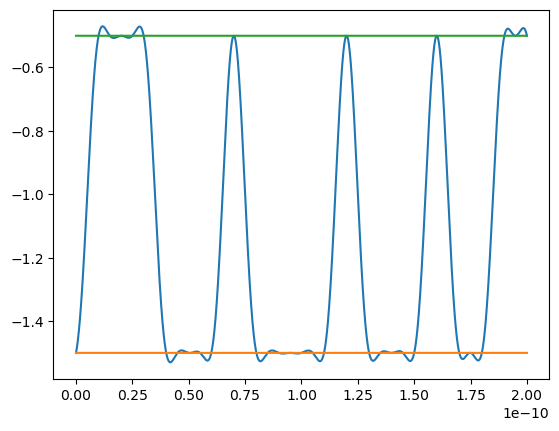

In [526]:

# creating signal sequence
sig = np.zeros(len(t))
T_normalized  = T/t0
plt.figure()
for i in range(len(prbs)):
    # std = 0.001*T_normalized
    # avrg = 0
    # random_timeshift =  std*np.random.randn()+avrg
    # print(random_timeshift)
    random_timeshift=0
    # x=np.zeros(len(t))
    for j in range(len(t)):
        sig[j] += rcos(t[j],1,T,(i+1)*T_normalized)
        # x[j] = rcos(t[j],1,T,(i+1)*T_normalized+random_timeshift)
    # plt.plot(t*t0,x)
sig = sig+vbias-vpp/2
plt.plot(t*t0,sig)
plt.plot(t*t0,-1.5*np.ones(len(t)))
plt.plot(t*t0,-0.5*np.ones(len(t)))

In [527]:
cum_t_index = np.zeros(N)
for q in range(N):
    if q==0:
        cum_t_index[q] = int(len(t_all_segment[q]))
    else:
        cum_t_index[q] = int(len(t_all_segment[q]) + cum_t_index[q-1])

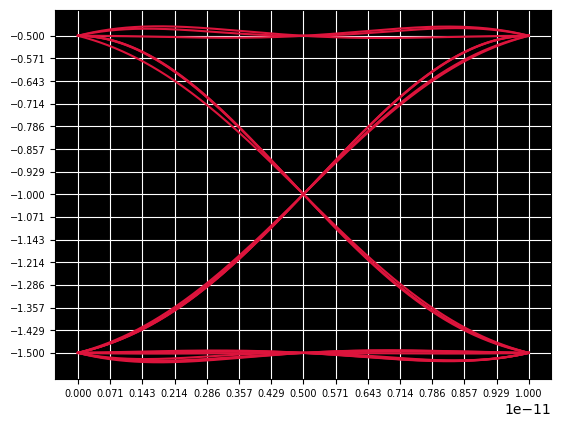

In [538]:
plt.figure()

for k in range(N):
    if k==0:
        sig_segment = sig[0:int(cum_t_index[k])]
        plt.plot( t0*(np.array(t_all_segment[0][:])),sig_segment, color='crimson')
    else:
        sig_segment = sig[int(cum_t_index[k-1]):int(cum_t_index[k])]
        last = t_all_segment[k-1][-1]
        plt.plot( t0*(np.array(t_all_segment[k][:])-last),sig_segment, color='crimson')


plt.grid(color='w')

ax = plt.gca()
ax.set_facecolor('k')
ax.set_xticks(np.linspace(tmin,tmin+T,15))
ax.set_yticks(np.linspace(vbias+vpp/2,vbias-vpp/2,15))
ax.tick_params(axis='both', which='major', labelsize=7)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
# plt.colorbar()
fig = plt.gcf()


In [529]:
prbs

array([1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1.])